In [ ]:
import tensorflow as tf
from tensorflow import keras                                                          

In [ ]:
cifar_10= tf.keras.datasets.cifar10

In [ ]:
(train_images,train_labels),(test_images,test_labels)= cifar_10.load_data()
train_images= train_images.reshape(train_images.shape[0],32,32,3)
test_images= test_images.reshape(test_images.shape[0],32,32,3)

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
train_images= train_images/255.0
test_images= test_images/255.0
train_images.shape
test_images.shape

(10000, 32, 32, 3)

DNN

In [ ]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs= {}):
    if(logs.get('accuracy')>0.7):
      self.model.stop_training= True

In [ ]:
callbacks= mycallback()
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(256,activation= 'relu'),
                                   tf.keras.layers.Dense(128,activation= 'relu'),
                                   tf.keras.layers.Dense(128,activation= 'relu'),
                                   tf.keras.layers.Dense(10,activation= 'softmax')])

In [ ]:
model.compile(optimizer= 'adam',loss= 'sparse_categorical_crossentropy',metrics= ['accuracy'])

In [ ]:
history= model.fit(train_images,train_labels,epochs= 50,callbacks= [callbacks])

Epoch 1/50
1563/1563 [==============================] - 5s 4ms/step - loss: 1.8652 - accuracy: 0.3212
Epoch 2/50
1563/1563 [==============================] - 5s 4ms/step - loss: 1.6775 - accuracy: 0.3977
Epoch 3/50
1563/1563 [==============================] - 5s 4ms/step - loss: 1.6016 - accuracy: 0.4228
Epoch 4/50
1563/1563 [==============================] - 5s 4ms/step - loss: 1.5540 - accuracy: 0.4410
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5170 - accuracy: 0.4557
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4877 - accuracy: 0.4664
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4590 - accuracy: 0.4772
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4396 - accuracy: 0.4840
Epoch 9/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4156 - accuracy: 0.4938
Epoch 10/50
1563/1563 [==============================] - 5s 4ms/step - loss: 1.397

In [ ]:
model.evaluate(test_images,test_labels)


313/313 [==============================] - 1s 3ms/step - loss: 1.6394 - accuracy: 0.4811


[1.6394107341766357, 0.4810999929904938]

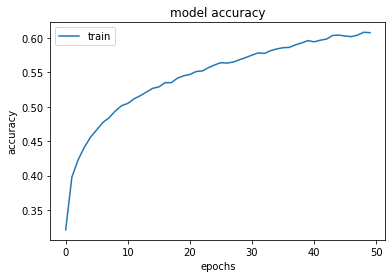

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train'],loc= 'upper left')
plt.show() 

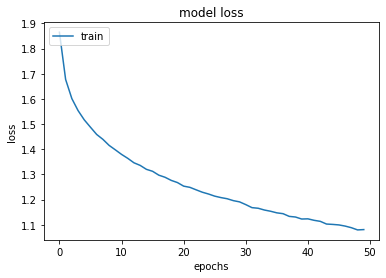

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train'],loc= 'upper left')
plt.show()

In [ ]:
import numpy as np
p=model.predict(test_images)
p = [np.argmax(x) for x in p]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,p))

              precision    recall  f1-score   support

           0       0.50      0.60      0.55      1000
           1       0.55      0.62      0.59      1000
           2       0.40      0.36      0.38      1000
           3       0.32      0.35      0.33      1000
           4       0.50      0.29      0.37      1000
           5       0.42      0.36      0.39      1000
           6       0.46      0.63      0.53      1000
           7       0.61      0.48      0.53      1000
           8       0.67      0.53      0.59      1000
           9       0.47      0.58      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.48     10000
weighted avg       0.49      0.48      0.48     10000



In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

cm=confusion_matrix(test_labels,p)
print(cm)

[[605  68  39  39  12  13  28  21  90  85]
 [ 37 625  14  32   3  13  33  15  42 186]
 [131  32 356  95  76  67 140  49  14  40]
 [ 55  28  77 354  32 188 153  35  17  61]
 [ 72  20 168  94 292  43 178  79  23  31]
 [ 54  25  83 241  30 365 106  44  23  29]
 [ 16  20  63  91  70  58 631  15   9  27]
 [ 54  37  61  87  56  82  57 476   7  83]
 [145  91  16  35  13  20  20  11 530 119]
 [ 51 183  18  46   4  15  32  36  38 577]]


CNN

In [ ]:
#callbacks= mycallback()
model1= tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(32,(3,3),activation= 'relu',input_shape= (32,32,3)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64,(3,3),activation= 'relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(128,(3,3),activation= 'relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   #tf.keras.layers.Conv2D(64,(3,3),activation= 'relu'),
                                   #tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Dropout(0.2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128,activation= 'relu'),
                                   
                                   tf.keras.layers.Dense(10,activation= 'softmax')])

In [ ]:
model1.compile(optimizer= 'adam',loss= 'sparse_categorical_crossentropy',metrics= ['accuracy'])

In [ ]:
early_stopping= tf.keras.callbacks.EarlyStopping()
cnn_history= model1.fit(train_images,train_labels,epochs= 10,callbacks= [early_stopping],validation_split= 0.2)

Epoch 1/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5562 - accuracy: 0.4294 - val_loss: 1.2858 - val_accuracy: 0.5406
Epoch 2/10
1250/1250 [==============================] - 8s 7ms/step - loss: 1.1986 - accuracy: 0.5743 - val_loss: 1.2123 - val_accuracy: 0.5654
Epoch 3/10
1250/1250 [==============================] - 8s 7ms/step - loss: 1.0426 - accuracy: 0.6299 - val_loss: 0.9664 - val_accuracy: 0.6610
Epoch 4/10
1250/1250 [==============================] - 8s 7ms/step - loss: 0.9376 - accuracy: 0.6711 - val_loss: 0.9109 - val_accuracy: 0.6885
Epoch 5/10
1250/1250 [==============================] - 8s 7ms/step - loss: 0.8640 - accuracy: 0.6962 - val_loss: 0.8947 - val_accuracy: 0.6888
Epoch 6/10
1250/1250 [==============================] - 8s 7ms/step - loss: 0.8015 - accuracy: 0.7169 - val_loss: 0.8395 - val_accuracy: 0.7080
Epoch 7/10
1250/1250 [==============================] - 8s 7ms/step - loss: 0.7485 - accuracy: 0.7373 - val_loss: 0.8358 - val_accuracy:

In [ ]:
model1.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.8172 - accuracy: 0.7198


[0.8172017335891724, 0.7197999954223633]

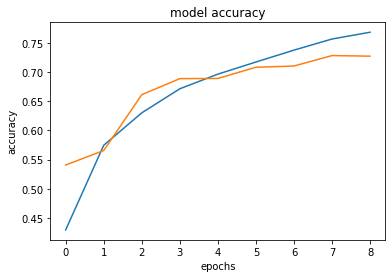

In [ ]:
import matplotlib.pyplot as plt
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

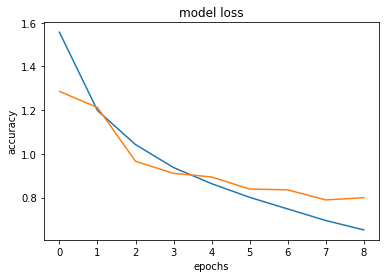

In [ ]:
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

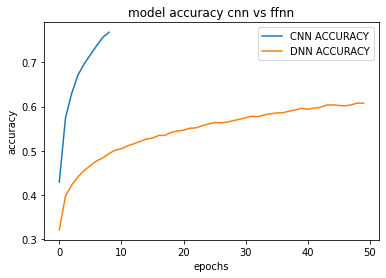

In [ ]:

plt.plot(cnn_history.history['accuracy'],label= 'CNN ACCURACY')
plt.plot(history.history['accuracy'],label= 'DNN ACCURACY')
plt.title('model accuracy cnn vs ffnn')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
#plt.plot(history.history['accuracy'])

#plt.title('model accuracy ffnn')
#plt.xlabel('epochs')
#plt.ylabel('accuracy')


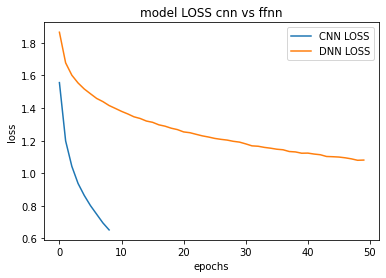

In [ ]:
plt.plot(cnn_history.history['loss'],label= 'CNN LOSS')
plt.plot(history.history['loss'],label= 'DNN LOSS')
plt.title('model LOSS cnn vs ffnn')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [ ]:
import numpy as np
p=model1.predict(test_images)
p = [np.argmax(x) for x in p]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,p))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77      1000
           1       0.83      0.84      0.83      1000
           2       0.64      0.59      0.62      1000
           3       0.54      0.51      0.52      1000
           4       0.62      0.74      0.68      1000
           5       0.60      0.65      0.62      1000
           6       0.77      0.78      0.78      1000
           7       0.78      0.73      0.75      1000
           8       0.85      0.81      0.83      1000
           9       0.77      0.83      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

cm=confusion_matrix(test_labels,p)
print(cm)

[[714  29  56  23  30   6  12  23  53  54]
 [  8 844   6  13   2   5  10   3  25  84]
 [ 40  10 590  68 100  81  58  27   9  17]
 [  7  12  54 508  90 212  62  29  11  15]
 [ 10   4  58  50 740  30  36  57  11   4]
 [  6   7  51 137  66 647  33  44   4   5]
 [  3   5  48  57  62  21 781  11   4   8]
 [  6   2  34  46  88  63   9 731   4  17]
 [ 52  35  13  24   7   6   6   8 809  40]
 [ 12  75   7  20   5   7   7  10  23 834]]


In [ ]:
model1.save('cifar_cnn.h5')

In [ ]:
!pip install streamlit                                                          

     |████████████████████████████████| 7.2MB 2.6MB/s 
     |████████████████████████████████| 112kB 39.7MB/s 
     |████████████████████████████████| 4.4MB 26.3MB/s 
     |████████████████████████████████| 102kB 9.7MB/s 
     |████████████████████████████████| 122kB 41.7MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13450 sha256=f2f9b19a3358c665e66539990d1eb0f4eb95d6f8ec193d3a7bb208897076a3c4
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
  Created wheel for watchdog: filename=watchdog-0.10.3-cp36-none-any.whl size=73873 sha256=27b0b4aa9c52ffecd70456a527a40ca7a8981e755dc5d164dfc64503f008413f
  Stored in directory: /root/.cache/pip/wheels/a8/1d/38/2c19bb311f67cc7b4d07a2ec5ea36ab1a0a0ea50db994a5bc7
  Created wheel for pathtools: filename=pathtools-0.1.2-cp36-none-any.whl size=8785 sha256=893c10067a560003df1484c2339dabdca2ca2fe70e7992f663c2b8f09dd9d0a7
  Stored in directory: /root/.cache/pip/wheel

In [ ]:
!pip install pyngrok

  Created wheel for pyngrok: filename=pyngrok-4.1.10-cp36-none-any.whl size=16378 sha256=14d7adb127bc06ac0c26188379c827bd3640b238314c1704f04d110fbfbe5a0e
  Stored in directory: /root/.cache/pip/wheels/0d/7f/06/e8079dd6f80eb6683fac47c4e1cb720b61cd82d6e4c13d87a5
Successfully built pyngrok


In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf

st.set_option('deprecation.showfileUploaderEncoding', False)
@st.cache(allow_output_mutation= True)
def load_model():
  model= tf.keras.models.load_model('/content/cifar_cnn.h5')
  return model
model= load_model()
st.write(""" # Image classification """) 
file= st.file_uploader("Please upload an image", type= ['jpg','png'])
import cv2
from PIL import Image,ImageOps
import numpy as np
def import_and_predict(image_data,model):
  size= (32,32)
  image= ImageOps.fit(image_data,size,Image.ANTIALIAS)
  img= np.asarray(image)
  img_reshape= img[np.newaxis,...]
  prediction= model.predict(img_reshape)
  return prediction
if file is None:
  st.text('Pls upload an img file')
else:
  image= Image.open(file)
  st.image(image, use_column_width= True)
  predictions= import_and_predict(image, model)
  classes= ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
  string= 'This image may be:'+classes[np.argmax(predictions)]
  st.success(string)

Writing app.py


In [ ]:
!ngrok authtoken 1ge0z8B2k4lruRa4D7E782iDhfa_4PfxsNzs4VzbjfDuaLrTZ

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url= ngrok.connect(port= 8501)
url

'http://35793ba072f8.ngrok.io'

In [ ]:
!cat '/content/nohup.out'